In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sphot.plotting import astroplot
from astropy.io import fits
from astropy.nddata import Cutout2D

In [40]:
folder_path = '/Volumes/S-Express/SH0ES_reprojected/N1559/'
Bdata = fits.open(folder_path+'F555W.fits')[0].data
Gdata = fits.open(folder_path+'F160W.fits')[0].data
Rdata = fits.open(folder_path+'F277W.fits')[0].data

cutout_size = 3000
B_cutout = Cutout2D(Bdata, (Bdata.shape[0]/2, Bdata.shape[1]/2), cutout_size).data
G_cutout = Cutout2D(Gdata, (Bdata.shape[0]/2, Bdata.shape[1]/2), cutout_size).data
R_cutout = Cutout2D(Rdata, (Bdata.shape[0]/2, Bdata.shape[1]/2), cutout_size).data

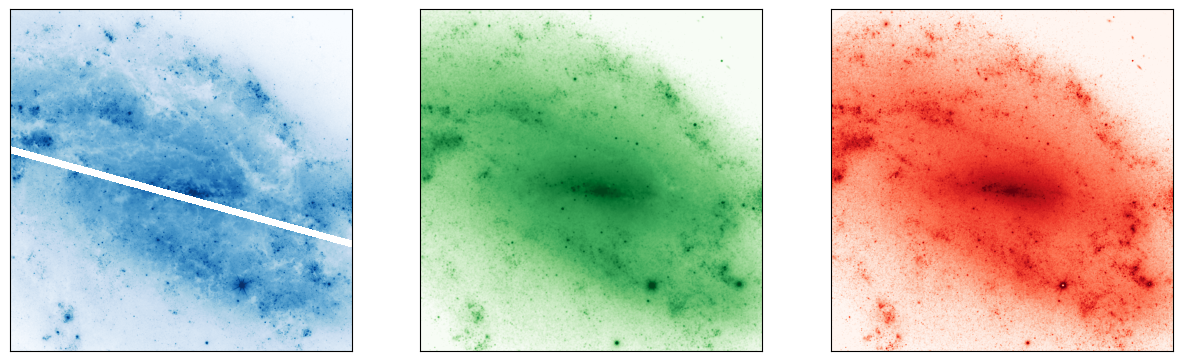

In [47]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
norm,offset = astroplot(B_cutout,ax=axes[0],cmap='Blues',set_bad='w',percentiles=[2,99.9])
B_norm = norm(B_cutout + offset)

norm,offset = astroplot(G_cutout,ax=axes[1],cmap='Greens',set_bad='w',percentiles=[9,99.9])
G_norm = norm(G_cutout + offset)

norm,offset = astroplot(R_cutout,ax=axes[2],cmap='Reds',set_bad='w',percentiles=[9.5,99.9])
R_norm = norm(R_cutout + offset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/sterling/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


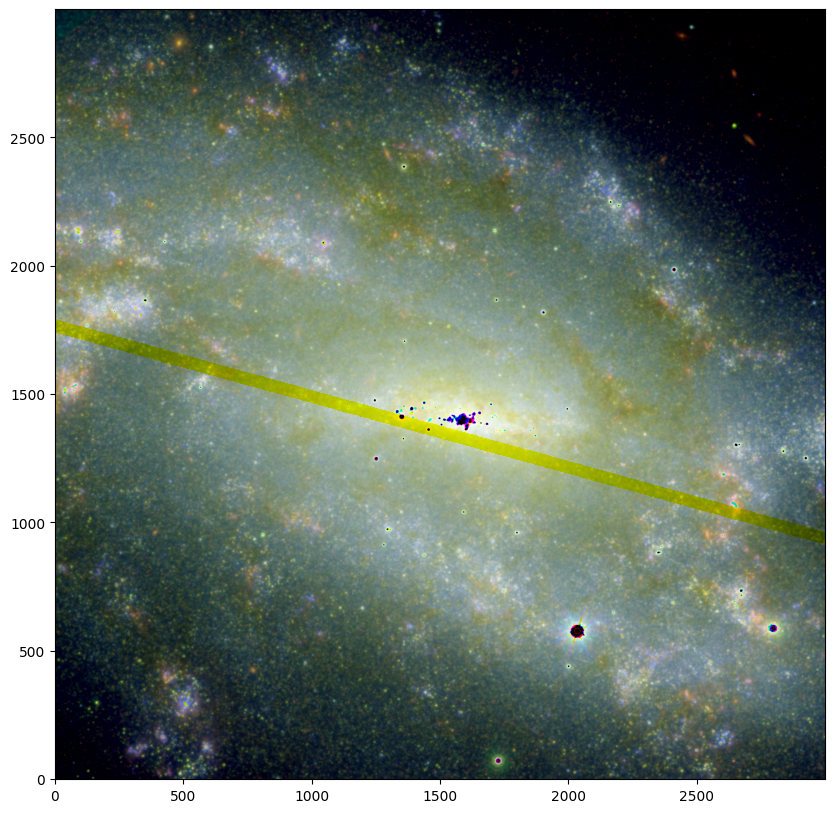

In [49]:
B_norm[B_norm>=1] = 0
G_norm[G_norm>=1] = 0
R_norm[R_norm>=1] = 0
img_rgb = np.dstack((R_norm,G_norm,B_norm))
plt.figure(figsize=(10,10))
plt.imshow(img_rgb,origin='lower')